In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

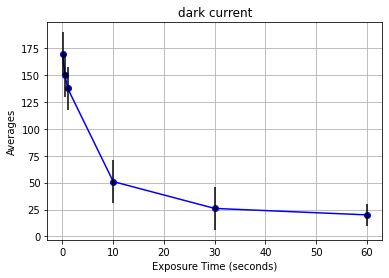

In [2]:
import matplotlib.pyplot as plt

# Beispiel-Daten: 6 Belichtungszeiten (in Sekunden) und deren Mittelwerte
exposure_times = [0.01, 0.5, 1, 10, 30, 60]  # Belichtungszeiten in Sekunden
averages = [1.7*10**2 , 1.5*10**2 , 1.38*10**2 , 0.51*10**2 , 0.26*10**2 , 0.2*10**2 ]      
d_averages =[0.2*10**2 , 0.2*10**2 , 0.2*10**2 , 0.2*10**2 , 0.2*10**2 , 0.1*10**2 ]
# Plotten der Daten
plt.plot(exposure_times, averages, marker='o', linestyle='-', color='b')
plt.errorbar(exposure_times, averages, yerr=d_averages, fmt='.k');

# Beschriftung der Achsen
plt.xlabel('Exposure Time (seconds)')
plt.ylabel('Averages')

# Titel des Plots
plt.title('dark current')

# Anzeigen des Plots
plt.grid(True)
plt.savefig("DarkCurrent.png")
plt.show()


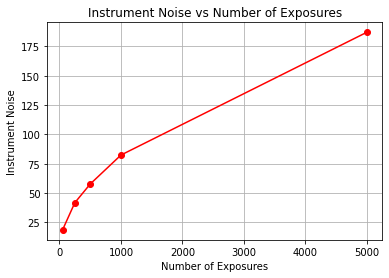

In [3]:
# Beispiel-Daten: Anzahl der Exposures und das zugehörige Instrumentenrauschen (Noise)
num_exposures = [50, 250, 500, 1000, 5000]  # Anzahl der Belichtungen
instrument_noise = [26.183, 59.005, 81.539, 116.51, 264.68]/np.sqrt(2)  # Instrumentenrauschen für jede Belichtung
 
# Plotten der Daten
plt.plot(num_exposures, instrument_noise, marker='o', linestyle='-', color='r')

# Beschriftung der Achsen
plt.xlabel('Number of Exposures')
plt.ylabel('Instrument Noise')

# Titel des Plots
plt.title('Instrument Noise vs Number of Exposures')

# Anzeigen des Plots
plt.grid(True)
plt.savefig("Instrument noise.png")
plt.show()


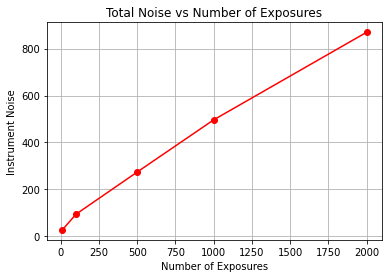

In [4]:
# Beispiel-Daten: Anzahl der Exposures und das zugehörige Instrumentenrauschen (Noise)
num_exposures = [10,100,500,1000,2000]  # Anzahl der Belichtungen
total_noise = [ 38.665,133.46,387.56, 701.95,1229.7]/np.sqrt(2)  # Instrumentenrauschen für jede Belichtung
 
    
# Plotten der Daten
plt.plot(num_exposures, total_noise, marker='o', linestyle='-', color='r')

# Beschriftung der Achsen
plt.xlabel('Number of Exposures')
plt.ylabel('Instrument Noise')

# Titel des Plots
plt.title('Total Noise vs Number of Exposures')

# Anzeigen des Plots
plt.grid(True)
plt.savefig("Total noise.png")
plt.show()


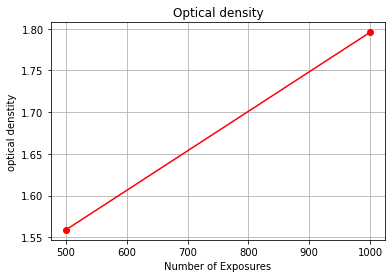

In [5]:
total_noise_1 = np.array([387.56, 701.95])
instrument_noise_1 = np.array([81.539, 116.51])


optical_density=np.log(total_noise_1/instrument_noise_1)
num_exposures = [500, 1000]

plt.plot(num_exposures, optical_density, marker='o', linestyle='-', color='r')


# Beschriftung der Achsen
plt.xlabel('Number of Exposures')
plt.ylabel('optical denstity')

# Titel des Plots
plt.title('Optical density')

# Anzeigen des Plots
plt.grid(True)
plt.savefig("Optical density.png")
plt.show()

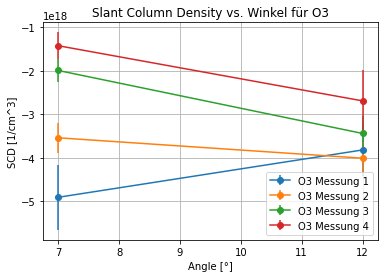

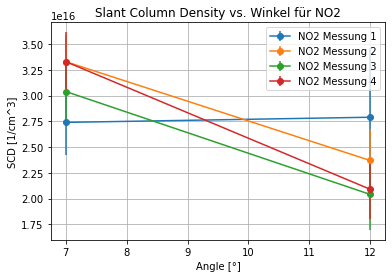

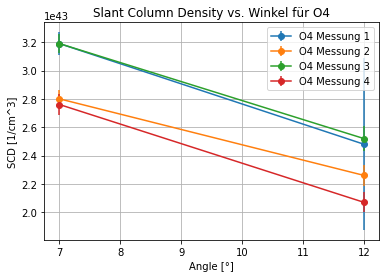

In [6]:
# Daten für die Gradzahl
angles = [7, 12]

# Werte für die Slant Column Density (SCD) für O3, NO2 und O4
scd_o3 = [[-4.91e18, -3.82e18], [-3.54e18,-4.01e18], [-1.99e18,-3.44e18], [-1.42e18,-2.69e18]]  # 4 Messungen für O3
scd_no2 = [[2.74e16,2.79e16], [3.33e16,2.37e16], [3.04e16,2.04e16], [3.33e16,2.09e16]]  # 4 Messungen für NO2
scd_o4 = [[3.19e43,2.48e43], [2.80e43,2.26e43], [3.19e43,2.52e43], [2.76e43, 2.07e43]]  # 4 Messungen für O4

scd_o3_err = [[7.51e17, 5.89e17], [3.48e17,3.80e17], [2.65e17,4.08e17], [3.10e17,7.03e17]]  # 4 Messungen für O3
scd_no2_err = [[3.13e15,6.7e15], [2.61e15,3.04e15], [2.64e15,3.45e15], [2.86e15,2.85e15]]  # 4 Messungen für NO2
scd_o4_err = [[8.0e41,6.05e42], [6.5e41,7.58e41], [6.6e41,8.64e41], [7.19e41, 7.16e41]]  # 4 Messungen für O4


# Funktion zum Zeichnen der einzelnen Graphen
def plot_scd_with_error(angles, scd_values, scd_errors, substance):
    plt.figure(figsize=(6, 4))
    
    # Zeichne eine Linie für jeden Satz (7° zu 12°)
    for i, (scd, err) in enumerate(zip(scd_values, scd_errors)):
        plt.errorbar(angles, scd, yerr=err, marker='o', linestyle='-', label=f'{substance} Messung {i+1}')
    
    # Beschriftungen und Titel hinzufügen
    plt.xlabel('Angle [°]')
    plt.ylabel('SCD [1/cm^3]')
    plt.title(f'Slant Column Density vs. Winkel für {substance}')
    plt.legend()
    plt.grid(True)
    
    

# Plot für O3
plot_scd_with_error(angles, scd_o3, scd_o3_err, 'O3')
plt.savefig("SCDvswinkelO3.png")

# Plot für NO2
plot_scd_with_error(angles, scd_no2, scd_no2_err, 'NO2')
plt.savefig("SCDvswinkelNO2.png")

# Plot für O4
plot_scd_with_error(angles, scd_o4, scd_o4_err, 'O4')
plt.savefig("SCDvswinkelO4.png")

plt.show()

Wir beobachten, dass die Slant column density bei einem klieneren Winkel größer ist, da der Weg L länger ist. Bei der ersten Messung haben wir genau das Gegenteil, was hinweist, dass wir die Daten vielleich falsch modelliert haben, oder wir die Ergebnisse beim speichern falsch abgescgrieben haben. Das Wetter was sehr schlecht und es gab fast nur Wölken, die aber sozusagen monoton waren, was wahrschenlich zu den nicht schlechten Ergebnisse geführt hat. 

O4 wird immer geringer mit Laufe der Höhe. C.a. 90% der O3 befindet sich in der Stratosphere. NO2 findet man in der Troposphäre. 

Wölken würden zu eine größere slant column density bei einem genauen Winkel führen, wegen mehr Streuung. Wie gesagt, es gab viele Wölken während der Messung, aber sie waren sehr homogen